In [208]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [277]:
from collections import defaultdict
#topics = [x for x in range(5,24)]
topics = [5,8,10,15,23]
iterations = [1,5,10]


output_dir = 'figures_2/'

# file_dir_list = ['experiments/output_oh/output_oh/','experiments/output_oh_stem/output_oh_stem/']
# file_dir_list_nmf = ['experiments/output_oh_nmf/output_oh_nmf/','experiments/output_oh_nmf_stem/output_oh_nmf_stem/']

file_dir_list = ['experiments/output_pa/output_pa/','experiments/output_pa_stem/output_pa_stem/']
file_dir_list_nmf = ['experiments/output_pa_nmf/output_pa_nmf/','experiments/output_pa_nmf_stem/output_pa_nmf_stem/']

def get_metrics(file_dir,topics,iterations):
    rmse_metrics = {x:[] for x in iterations}
    mse_metrics =  {x:[] for x in iterations}
    pearson_metrics = {x:[] for x in iterations}
    metrics = {'MSE': mse_metrics,'RMSE':rmse_metrics,'Pearsons':pearson_metrics}
    for topic in topics:
        for i in iterations:
            filename = str(topic) + "_" + str(i) + '_evaluation_metrics.txt'
            with open(file_dir+filename,'r') as f:
                for line in f:
                    line = line.split(',')
                    metrics[line[0]][i].append(float(line[1]))
                    
    return metrics

def get_metrics_nmf(file_dir,topics,iterations):
    rmse_metrics = {x:[] for x in iterations}
    mse_metrics =  {x:[] for x in iterations}
    pearson_metrics = {x:[] for x in iterations}
    metrics = {'MSE': mse_metrics,'RMSE':rmse_metrics,'Pearsons':pearson_metrics}
    for topic in topics:
        for i in iterations:
            filename = str(topic) + '_evaluation_metrics.txt'
            with open(file_dir+filename,'r') as f:
                for line in f:
                    line = line.split(',')
                    metrics[line[0]][i].append(float(line[1]))
                    
    return metrics

def get_model_metrics(file_dir,topics,iterations):
    pos_p = {x:[] for x in iterations}
    neg_p =  {x:[] for x in iterations}
    pos_ll = {x:[] for x in iterations}
    neg_ll = {x:[] for x in iterations}
    metrics = {'POS_Perplexity': pos_p,'NEG_Perplexity':neg_p,'POS_LL':pos_ll,'NEG_LL':neg_ll}
    for topic in topics:
        for i in iterations:
            filename = str(topic) + "_" + str(i) + '_model_evaluation.txt'
            with open(file_dir+filename,'r') as f:
                for line in f:
                    line = line.split(',')
                    metrics[line[0]][i].append(float(line[1]))
    
    return metrics
        
        

In [321]:
import numpy as np
import matplotlib.pyplot as plt
def generate_graph_for_measure(metrics,measure_name,no_topics,no_iterations,colors,filename):
    barWidth = 0.25
    rs = []
    #plt.figure(figsize=(30,50))
    i = 0
    for x in no_iterations:
        measure_for_iteration = metrics[measure_name][x]
        plt.plot(no_topics,measure_for_iteration,color=colors[i],label=str(x) +' iteration')
        i+=1
    
    
    plt.xlabel('No of topics')
    plt.ylabel(measure_name)
    plt.title(measure_name + ' vs No of topics')
    plt.xticks(np.arange(min(no_topics), max(no_topics)+1, 1.0))
    #plt.xticks([r + barWidth for r in range(len(no_topics))], [str(x) for x in no_topics])

    plt.legend()
    plt.savefig(filename)

In [279]:
colors = ['#0099ff','#00cc66','#9933ff']

In [280]:
metrics = get_metrics(file_dir_list[0],topics,iterations)
metrics_stem = get_metrics(file_dir_list[1],topics,iterations)

metrics_nmf = get_metrics_nmf(file_dir_list_nmf[0],topics,[200])
metrics_nmf_stem = get_metrics_nmf(file_dir_list_nmf[1],topics,[200])

In [332]:
def generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name):
    i = 0
    for key in metrics_list:
        metrics = metrics_list[key]
        plt.plot(topics,metrics,color=colors[i],label=key)
        i+=1
    plt.xlabel('No of topics')
    plt.ylabel(measure_name)
    plt.title(graph_name)
    plt.xticks(np.arange(min(topics), max(topics)+1, 1.0))
    plt.legend()
    plt.savefig(output_dir + graph_name)
    

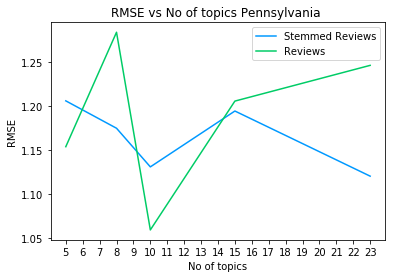

In [238]:
measure_name = 'RMSE'
metrics_list = {'Stemmed Reviews':metrics_stem[measure_name][1],'Reviews':metrics[measure_name][1]}
graph_name = measure_name + ' vs No of topics Pennsylvania '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

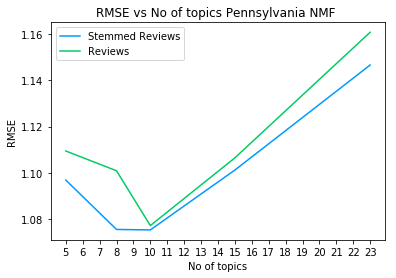

In [239]:
metrics_list = {'Stemmed Reviews':metrics_nmf_stem[measure_name][200],'Reviews':metrics_nmf[measure_name][200]}
graph_name = measure_name + ' vs No of topics Pennsylvania NMF '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [225]:
n_components = [5, 5, 5, 8, 8, 8, 10, 10, 10, 15, 15, 15, 23, 23, 23]
max_iter = [1, 5, 10, 1, 5, 10, 1, 5, 10, 1, 5, 10, 1, 5, 10]
pos_perp = [6596.29789833388, 6502.992378239573, 6485.563985503624, 7808.0905034562475, 7731.469488628935, 7722.814792550892, 8189.637358629838, 8124.996157382475, 8117.0425724607085, 10164.529241771135, 10083.541863223201, 10080.362774758549, 10816.203617080824, 10732.546175524647, 10723.54779042622]
neg_perp = [6117.117898448365, 6039.398725816132, 6026.719084263864, 7145.39002315499, 7083.382041366894, 7076.737670582292, 7716.070961488411, 7642.264107001985, 7634.01455559669, 8490.571057247953, 8437.527506922657, 8431.390504474854, 9275.869410710611, 9194.060691565986, 9185.587269755082]
pos_neg_ll = [-15990475.628225578, -15964572.107074473, -15959692.457875144, -16297132.75292348, -16279201.749719338, -16277165.200753883, -16383881.622875795, -16369472.874576673, -16367692.078042809, -16776693.883614037, -16762148.409337372, -16761575.059269546, -16889684.297231935, -16875566.187004857, -16874041.06065439]
neg_neg_ll = [-6214143.959447483, -6205030.626865198, -6203532.6956976205, -6324884.63832538, -6318672.584563295, -6318003.718364814, -6379648.964049848, -6372798.686243359, -6372028.908968787, -6447821.846889023, -6443355.236113061, -6442836.649417614, -6510869.600591125, -6504555.820321424, -6503898.656039593]
mse = [1.0459842472383865, 1.0274536096551496, 1.0293969114366333, 0.9005586314846163, 0.8593774017301998, 0.8527887629378178, 1.0061534725355357, 0.9986463560039247, 0.9922452006691007, 1.1457968059610222, 1.1120029624453376, 1.082890236481872, 0.9990865385845857, 0.9858478029933633, 0.9892579702110035]
pearson = [0.4560229556231152, 0.47549480537134275, 0.4750807498273148, 0.566141692384299, 0.586899678363671, 0.5907218340174123, 0.4909097042462987, 0.4950807111599448, 0.49934322173700496, 0.3458077323831503, 0.3771763244743761, 0.40466220112920387, 0.6147571074490515, 0.6128135938407616, 0.6079172713243063]
rmse = [1.0227337127710157, 1.0136338637077738, 1.0145919925943794, 0.9489776770212334, 0.9270261062829891, 0.9234656262892614, 1.0030720176216341, 0.9993229488028006, 0.9961150539315731, 1.0704189861736488, 1.054515510765649, 1.0406201211209938, 0.9995431649431583, 0.9928986871747607, 0.9946144832099538]
duration = [425, 836, 3319, 342, 719, 1157, 370, 828, 1371, 453, 1048, 1714, 435, 1099, 1820]


In [266]:
iterations = [1,5,10]
rmse_metrics = {x:[] for x in iterations}
mse_metrics =  {x:[] for x in iterations}
pearson_metrics = {x:[] for x in iterations}
pos_perp_metrics = {x:[] for x in iterations}
neg_perp_metrics = {x:[] for x in iterations}
pos_neg_ll_metrics = {x:[] for x in iterations}
neg_neg_ll_metrics = {x:[] for x in iterations}

print(rmse_metrics)

for x in range(len(iterations)):
    rmse_metrics[iterations[x]] = [rmse[i] for i in range(x,len(rmse),3)]
    mse_metrics[iterations[x]] = [mse[i] for i in range(x,len(mse),3)]
    pearson_metrics[iterations[x]] = [pearson[i] for i in range(x,len(pearson),3)]
    pos_perp_metrics[iterations[x]] = [pos_perp[i] for i in range(x,len(pos_perp),3)]
    neg_perp_metrics[iterations[x]] = [neg_perp[i] for i in range(x,len(neg_perp),3)]
    pos_neg_ll_metrics[iterations[x]] = [pos_neg_ll[i] for i in range(x,len(pos_neg_ll),3)]
    neg_neg_ll_metrics[iterations[x]] = [neg_neg_ll[i] for i in range(x,len(neg_neg_ll),3)]


{1: [], 5: [], 10: []}


In [228]:
file_dir_list = ['experiments/output_nv_stem/output_nv_stem/','experiments/output_nv_stem/output_nv_stem/']
file_dir_list_nmf = ['experiments/output_nv_nmf/output_nv_nmf/','experiments/output_nv_nmf_stem/output_nv_nmf_stem/']

metrics_nv = {'MSE': mse_metrics,'RMSE':rmse_metrics,'Pearsons':pearson_metrics}
metric_nv_stem = get_metrics(file_dir_list[1],topics,iterations)




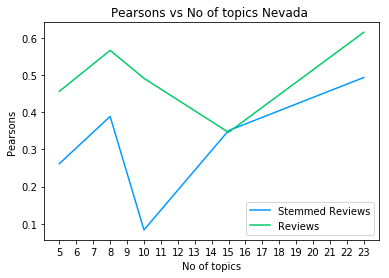

In [240]:
measure_name = 'Pearsons'
metrics_list = {'Stemmed Reviews':metric_nv_stem[measure_name][1],'Reviews':metrics_nv[measure_name][1]}
graph_name = measure_name + ' vs No of topics Nevada '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [241]:
metrics_nmf = get_metrics_nmf(file_dir_list_nmf[0],topics,[200])
metrics_nmf_stem = get_metrics_nmf(file_dir_list_nmf[1],topics,[200])

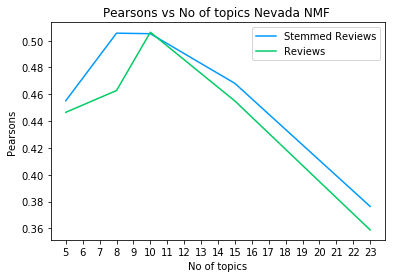

In [242]:
metrics_list = {'Stemmed Reviews':metrics_nmf_stem[measure_name][200],'Reviews':metrics_nmf[measure_name][200]}
graph_name = measure_name + ' vs No of topics Nevada NMF '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [294]:
# file_dir_list = ['experiments/output_az/output_az/','experiments/output_az_stem/output_az_stem/']
file_dir_list = ['experiments/output_pa (1)/output_pa/','experiments/output_pa_stem (1)/output_pa_stem/']
iterations = [1]
metrics = get_model_metrics(file_dir_list[0],topics,iterations)
metrics_stem = get_model_metrics(file_dir_list[1],topics,iterations)

metrics_eval = get_metrics(file_dir_list[0],topics,iterations)
metrics_eval_stem = get_metrics(file_dir_list[1],topics,iterations)


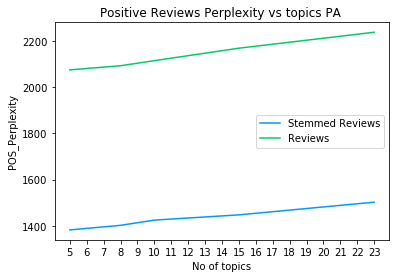

In [296]:
measure_name = 'POS_Perplexity'
metrics_list = {'Stemmed Reviews':metrics_stem[measure_name][1],'Reviews':metrics[measure_name][1]}
graph_name =  'Positive Reviews Perplexity vs topics PA '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [334]:
#file_dir_list = ['experiments/output_nv (1)/output_nv/','experiments/output_nv_stem (1)/output_nv_stem/']
file_dir_list = ['experiments/output_pa (1)/output_pa/','experiments/output_pa_stem (1)/output_pa_stem/']
#metrics = {'POS_Perplexity': pos_perp_metrics,'NEG_Perplexity':neg_perp_metrics,'POS_LL':pos_neg_ll_metrics,'NEG_LL':neg_neg_ll_metrics}
metrics_stem = get_model_metrics(file_dir_list[1],topics,iterations)
metrics = get_model_metrics(file_dir_list[0],topics,iterations)

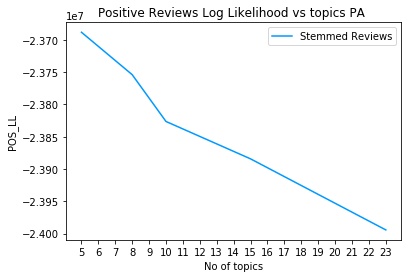

In [341]:
measure_name = 'POS_LL'
metrics_list = {'Stemmed Reviews':metrics_stem[measure_name][1]}
graph_name = 'Positive Reviews Log Likelihood vs topics PA '
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [323]:
file_dir_list = ['experiments/output_nv_stem (1)/output_nv_stem/','experiments/output_pa_stem (1)/output_pa_stem/',
                 'experiments/output_oh_stem (1)/output_oh_stem/','experiments/output_az_stem/output_az_stem/']

colors = ['#0099ff','#00cc66','#9933ff','red']
iterations = [1]
metrics_nv = get_model_metrics(file_dir_list[0],topics,iterations)
metrics_pa = get_model_metrics(file_dir_list[1],topics,iterations)
metrics_oh = get_model_metrics(file_dir_list[2],topics,iterations)
metrics_az = get_model_metrics(file_dir_list[3],topics,iterations)

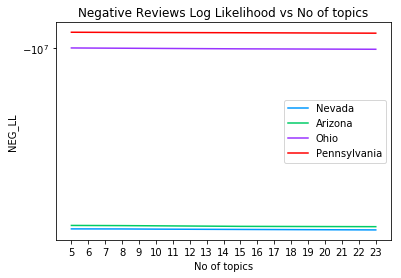

In [328]:
measure_name = 'NEG_LL'
metrics_list = {'Nevada':metrics_nv[measure_name][1],'Arizona':metrics_az[measure_name][1],'Ohio':metrics_oh[measure_name][1],
                'Pennsylvania':metrics_pa[measure_name][1]}
graph_name = 'Negative Reviews Log Likelihood vs No of topics'
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [317]:
file_dir_list = ['experiments/output_pa_nmf/output_pa_nmf/',
                 'experiments/output_oh_nmf/output_oh_nmf/','experiments/output_az_nmf/output_az_nmf/',
                'experiments/output_nv_nmf/output_nv_nmf/']
iterations = [200]
metrics_pa = get_metrics_nmf(file_dir_list[0],topics,iterations)
metrics_oh = get_metrics_nmf(file_dir_list[1],topics,iterations)
metrics_az = get_metrics_nmf(file_dir_list[2],topics,iterations)
metrics_nv = get_metrics_nmf(file_dir_list[3],topics,iterations)

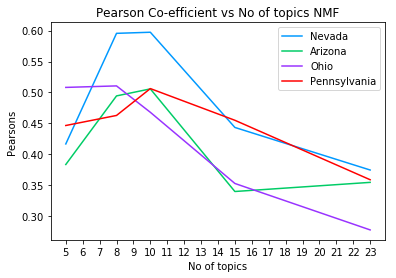

In [320]:
measure_name = 'Pearsons'
metrics_list = {'Nevada':metrics_nv[measure_name][200],'Arizona':metrics_az[measure_name][200],'Ohio':metrics_oh[measure_name][200],
                'Pennsylvania':metrics_pa[measure_name][200]}
graph_name = 'Pearson Co-efficient vs No of topics NMF'
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)

In [343]:
file_dir_list = ['experiments/output_pa (1)/output_pa/',
                 'experiments/output_oh (1)/output_oh/','experiments/output_az/output_az/']
iterations = [1]
metrics_pa = get_metrics(file_dir_list[0],topics,iterations)
metrics_oh = get_metrics(file_dir_list[1],topics,iterations)
metrics_az = get_metrics(file_dir_list[2],topics,iterations)
metrics_nv = {'MSE': mse_metrics,'RMSE':rmse_metrics,'Pearsons':pearson_metrics}

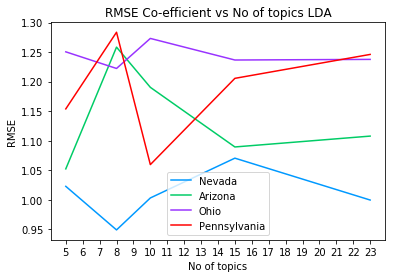

In [346]:
measure_name = 'RMSE'
metrics_list = {'Nevada':metrics_nv[measure_name][1],'Arizona':metrics_az[measure_name][1],'Ohio':metrics_oh[measure_name][1],
                'Pennsylvania':metrics_pa[measure_name][1]}
graph_name = 'RMSE Co-efficient vs No of topics LDA'
generate_line_graph(graph_name,output_dir,metrics_list,topics,colors,measure_name)